<h1 style=" text-align:center; font-size:40px;"> <u><b>World Happiness Report 2021</b></u> </h1>



# **About The Data**

The happiness scores and rankings use data from the Gallup World Poll . The columns following the happiness score estimate the extent to which each of six factors – economic production, social support, life expectancy, freedom, absence of corruption, and generosity – contribute to making life evaluations higher in each country than they are in Dystopia, a hypothetical country that has values equal to the world’s lowest national averages for each of the six factors. They have no impact on the total score reported for each country, but they do explain why some countries rank higher than others.

In [1]:
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd 
import os
import seaborn as sns
from scipy.stats import ttest_ind
from scipy.stats import chi2_contingency
import plotly.express as px



In [2]:
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

World_Happiness = pd.read_csv("../input/world-happiness-report-2021/world-happiness-report-2021.csv")


/kaggle/input/world-happiness-report-2021/world-happiness-report-2021.csv
/kaggle/input/world-happiness-report-2021/world-happiness-report.csv


In [3]:
pd.set_option('display.max_rows', None)
World_Happiness.head()

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.0,0.949,-0.098,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253
1,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.7,0.946,0.030,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868
2,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.4,0.919,0.025,0.292,2.43,1.566,1.079,0.816,0.653,0.204,0.413,2.839
3,Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.0,0.955,0.160,0.673,2.43,1.482,1.172,0.772,0.698,0.293,0.170,2.967
4,Netherlands,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.4,0.913,0.175,0.338,2.43,1.501,1.079,0.753,0.647,0.302,0.384,2.798


In [4]:
World_Happiness.shape

(149, 20)

In [5]:
World_Happiness.describe()

,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
count,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.00,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000
mean,5.532839,0.058752,5.648007,5.417631,9.432208,0.814745,64.992799,0.791597,-0.015134,0.727450,2.43,0.977161,0.793315,0.520161,0.498711,0.178047,0.135141,2.430329
std,1.073924,0.022001,1.054330,1.094879,1.158601,0.114889,6.762043,0.113332,0.150657,0.179226,0.00,0.404740,0.258871,0.213019,0.137888,0.098270,0.114361,0.537645
min,2.523000,0.026000,2.596000,2.449000,6.635000,0.463000,48.478000,0.382000,-0.288000,0.082000,2.43,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.648000
25%,4.852000,0.043000,4.991000,4.706000,8.541000,0.750000,59.802000,0.718000,-0.126000,0.667000,2.43,0.666000,0.647000,0.357000,0.409000,0.105000,0.060000,2.138000
50%,5.534000,0.054000,5.625000,5.413000,9.569000,0.832000,66.603000,0.804000,-0.036000,0.781000,2.43,1.025000,0.832000,0.571000,0.514000,0.164000,0.101000,2.509000
75%,6.255000,0.070000,6.344000,6.128000,10.421000,0.905000,69.600000,0.877000,0.079000,0.845000,2.43,1.323000,0.996000,0.665000,0.603000,0.239000,0.174000,2.794000
max,7.842000,0.173000,7.904000,7.780000,11.647000,0.983000,76.953000,0.970000,0.542000,0.939000,2.43,1.751000,1.172000,0.897000,0.716000,0.541000,0.547000,3.482000


* Left skewed: Ladder score, Logged GDP per capita, Social support, Health Life expectancy and Freedom to make life choices.
* Right skewed: Generosity.
* No skew: Ladder score in Dystopia	Explained by: Log GDP per  

In [6]:
World_Happiness.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 20 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Country name                                149 non-null    object 
 1   Regional indicator                          149 non-null    object 
 2   Ladder score                                149 non-null    float64
 3   Standard error of ladder score              149 non-null    float64
 4   upperwhisker                                149 non-null    float64
 5   lowerwhisker                                149 non-null    float64
 6   Logged GDP per capita                       149 non-null    float64
 7   Social support                              149 non-null    float64
 8   Healthy life expectancy                     149 non-null    float64
 9   Freedom to make life choices                149 non-null    float64
 10  Generosity    

In [7]:
print('Catgeorial Columns are : ')

for i in World_Happiness.columns:
    if World_Happiness[i].dtype == 'O':
        print(i)
print()


print('Continuous Columns are : ')

for i in World_Happiness.columns:
    if World_Happiness[i].dtype != 'O':
        print(i)


Catgeorial Columns are : 
Country name
Regional indicator

Continuous Columns are : 
Ladder score
Standard error of ladder score
upperwhisker
lowerwhisker
Logged GDP per capita
Social support
Healthy life expectancy
Freedom to make life choices
Generosity
Perceptions of corruption
Ladder score in Dystopia
Explained by: Log GDP per capita
Explained by: Social support
Explained by: Healthy life expectancy
Explained by: Freedom to make life choices
Explained by: Generosity
Explained by: Perceptions of corruption
Dystopia + residual


In [8]:
World_Happiness[World_Happiness.duplicated()]

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual


In [9]:
print( 'Unique values in Countries are : ',World_Happiness['Country name'].unique() )
print()
print( 'Number of Unique values in Countires are : ', len( World_Happiness['Country name'].unique() ) )


Unique values in Countries are :  ['Finland' 'Denmark' 'Switzerland' 'Iceland' 'Netherlands' 'Norway'
 'Sweden' 'Luxembourg' 'New Zealand' 'Austria' 'Australia' 'Israel'
 'Germany' 'Canada' 'Ireland' 'Costa Rica' 'United Kingdom'
 'Czech Republic' 'United States' 'Belgium' 'France' 'Bahrain' 'Malta'
 'Taiwan Province of China' 'United Arab Emirates' 'Saudi Arabia' 'Spain'
 'Italy' 'Slovenia' 'Guatemala' 'Uruguay' 'Singapore' 'Kosovo' 'Slovakia'
 'Brazil' 'Mexico' 'Jamaica' 'Lithuania' 'Cyprus' 'Estonia' 'Panama'
 'Uzbekistan' 'Chile' 'Poland' 'Kazakhstan' 'Romania' 'Kuwait' 'Serbia'
 'El Salvador' 'Mauritius' 'Latvia' 'Colombia' 'Hungary' 'Thailand'
 'Nicaragua' 'Japan' 'Argentina' 'Portugal' 'Honduras' 'Croatia'
 'Philippines' 'South Korea' 'Peru' 'Bosnia and Herzegovina' 'Moldova'
 'Ecuador' 'Kyrgyzstan' 'Greece' 'Bolivia' 'Mongolia' 'Paraguay'
 'Montenegro' 'Dominican Republic' 'North Cyprus' 'Belarus' 'Russia'
 'Hong Kong S.A.R. of China' 'Tajikistan' 'Vietnam' 'Libya' 'Malaysia'
 

In [10]:
print('Unique values in Regional Indicator are : ',World_Happiness['Regional indicator'].unique())
print()
print('Number of Unique values in Regional Indicator are : ',len(World_Happiness['Regional indicator'].unique()))

Unique values in Regional Indicator are :  ['Western Europe' 'North America and ANZ' 'Middle East and North Africa'
 'Latin America and Caribbean' 'Central and Eastern Europe' 'East Asia'
 'Southeast Asia' 'Commonwealth of Independent States'
 'Sub-Saharan Africa' 'South Asia']

Number of Unique values in Regional Indicator are :  10


**Elementary Results**
* 2 Categorical and 18 Countinuous features exists.
* We have 149 unique countries.
* There are 10 regional Indicators.
* 0 duplicate rows found.
* No null values found.

In [11]:
pd.crosstab(World_Happiness['Country name'], World_Happiness['Regional indicator']).head(10)


Regional indicator,Central and Eastern Europe,Commonwealth of Independent States,East Asia,Latin America and Caribbean,Middle East and North Africa,North America and ANZ,South Asia,Southeast Asia,Sub-Saharan Africa,Western Europe
Country name,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,1,0,0,0
Albania,1,0,0,0,0,0,0,0,0,0
Algeria,0,0,0,0,1,0,0,0,0,0
Argentina,0,0,0,1,0,0,0,0,0,0
Armenia,0,1,0,0,0,0,0,0,0,0
Australia,0,0,0,0,0,1,0,0,0,0
Austria,0,0,0,0,0,0,0,0,0,1
Azerbaijan,0,1,0,0,0,0,0,0,0,0
Bahrain,0,0,0,0,1,0,0,0,0,0


<AxesSubplot:>

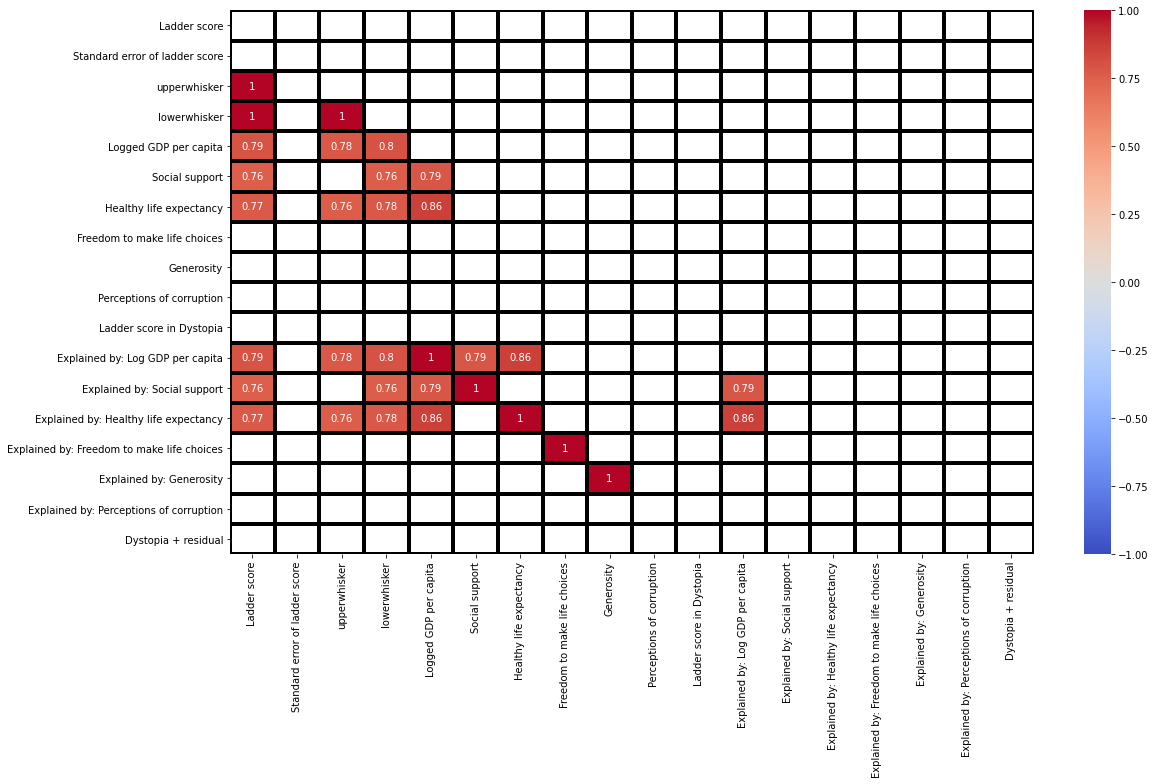

In [12]:
plt.figure( figsize = [18,10] )
masking = np.triu(World_Happiness.corr()[World_Happiness.corr()>.75])
sns.heatmap( World_Happiness.corr()[World_Happiness.corr()>.75], annot = True, mask = masking, cmap = 'coolwarm', vmin = -1, vmax = 1, center = 0, linewidths = 4, linecolor = 'black' )

**Elementary Results**

>* Logged GDp per capita corelated with Ladder score, upper whisker, Social support and lower whisker.
>* Social support linked with Ladder score Lower whisker, logged gdp per capita.
>* Health life expectancy linked with ladder score, upper whisker, lower whisker and logged gdp per capita.
>* explained by logged gdp per capita related with Ladder score, upper whisker, Social support, health life expectancy and lower whisker.
>* explained by social supoort related with Ladder score,  lower whisker and explained by logged gdp per capita.
>explained by Health life expectancy  linked with ladder score, upper whisker, lower whisker, logged gdp per capita and explained by logged gdp per capita.



### Regional Indicator distribution according to Geographical Area

In [13]:
fig = px.pie(values=World_Happiness.groupby('Regional indicator').count()['Country name'].sort_values().values, names=World_Happiness.groupby('Regional indicator').count()['Country name'].sort_values().index, title = 'Number Of Indicators Present According To Geographical Area', color_discrete_sequence=px.colors.sequential.RdBu)
fig.show()

> **Most numer of indicators are present for Sub-Saharan Africa and least number of indicators are present for North America and ANZ**

## How is corruption related to Happiness?

Text(0.5, 1.0, 'Happiness Score ')

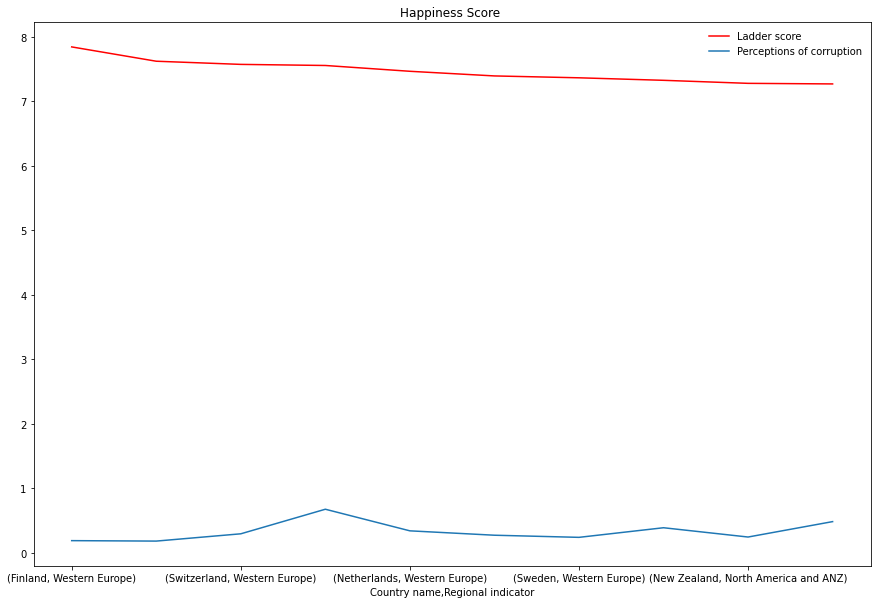

In [14]:
plt.figure(figsize = (15,10))
World_Happiness.groupby(['Country name', 'Regional indicator']).mean()['Ladder score'].sort_values(ascending = False)[:10].plot(kind ='line', color ='red')
World_Happiness[World_Happiness['Country name'].isin([x for x, y in list(World_Happiness.groupby(['Country name', 'Regional indicator']).mean()['Ladder score'].sort_values(ascending = False)[:10].index.values[0:])])]['Perceptions of corruption'].plot(kind = 'line')
plt.legend(loc='upper right', frameon=False)
plt.title('Happiness Score ')


> **The above line graph shows Corrpution score is inversely proprtional to Happiness score.**

### Question: Which region is the happiest and whyso?

In [15]:
fig = px.bar(x = World_Happiness.groupby('Regional indicator').mean().sort_values(by = 'Ladder score', ascending = False)[:5]['Ladder score'].index, y = World_Happiness.groupby('Regional indicator').mean().sort_values(by = 'Ladder score', ascending = False)[:5]['Ladder score'].values, height=400, title = 'Ladder scores for five happiest regions', labels = {'x': 'Region Name', 'y' : 'Ladder Score'}, color_discrete_sequence=px.colors.qualitative.D3)
fig.update_traces(marker_color='purple')

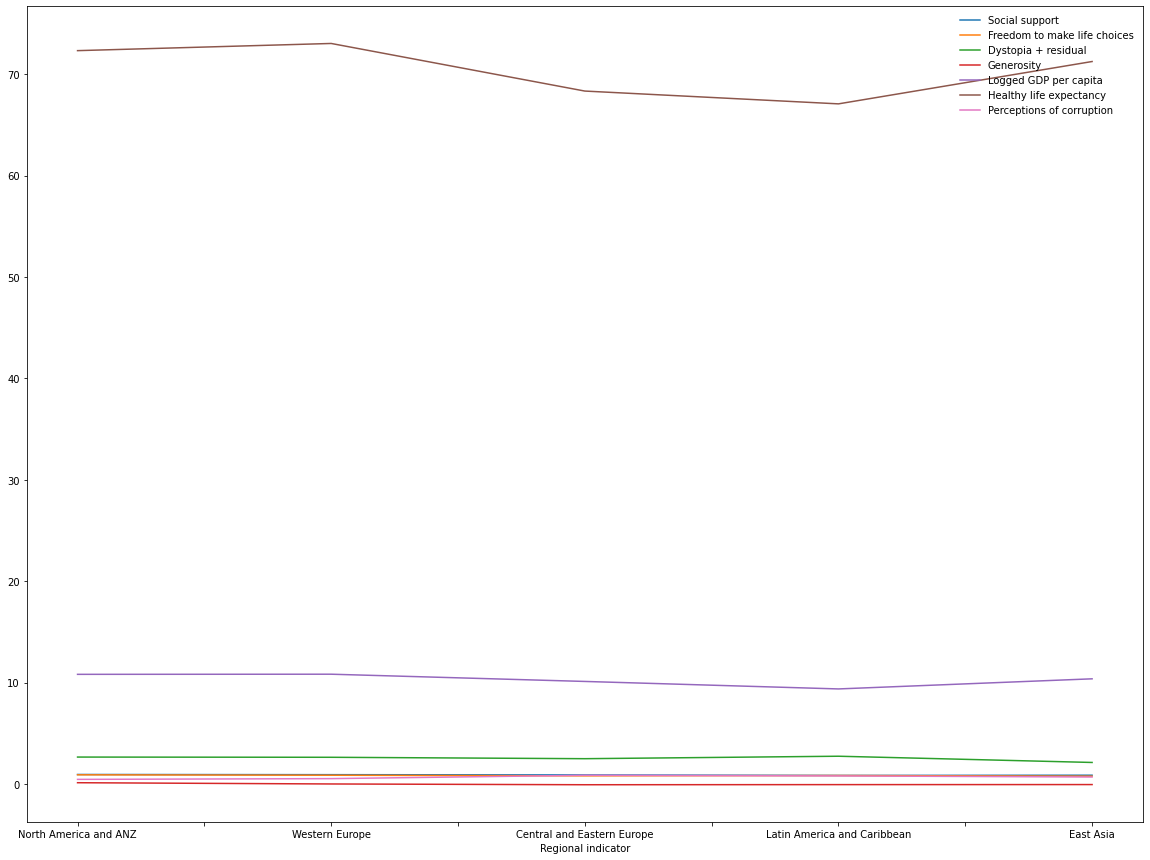

In [16]:
plt.figure( figsize = (20,15))
World_Happiness.groupby('Regional indicator').mean().sort_values(by = 'Ladder score', ascending = False)[:5]['Social support'].plot(kind = 'line')
plt.legend(loc='upper right', frameon=False)
World_Happiness.groupby('Regional indicator').mean().sort_values(by = 'Ladder score', ascending = False)[:5]['Freedom to make life choices'].plot(kind = 'line')
plt.legend(loc='upper right', frameon=False)
World_Happiness.groupby('Regional indicator').mean().sort_values(by = 'Ladder score', ascending = False)[:5]['Dystopia + residual'].plot(kind = 'line')
plt.legend(loc='upper right', frameon=False)
World_Happiness.groupby('Regional indicator').mean().sort_values(by = 'Ladder score', ascending = False)[:5]['Generosity'].plot(kind = 'line')
plt.legend(loc='upper right', frameon=False)
World_Happiness.groupby('Regional indicator').mean().sort_values(by = 'Ladder score', ascending = False)[:5]['Logged GDP per capita'].plot(kind = 'line')
plt.legend(loc='upper right', frameon=False)
World_Happiness.groupby('Regional indicator').mean().sort_values(by = 'Ladder score', ascending = False)[:5]['Healthy life expectancy'].plot(kind = 'line')
plt.legend(loc='upper right', frameon=False)
World_Happiness.groupby('Regional indicator').mean().sort_values(by = 'Ladder score', ascending = False)[:5]['Perceptions of corruption'].plot(kind = 'line')
plt.legend(loc='upper right', frameon=False)


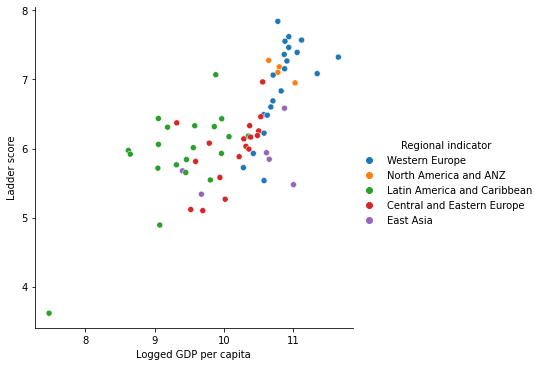

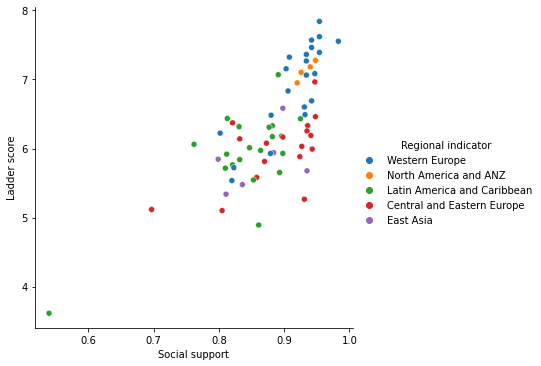

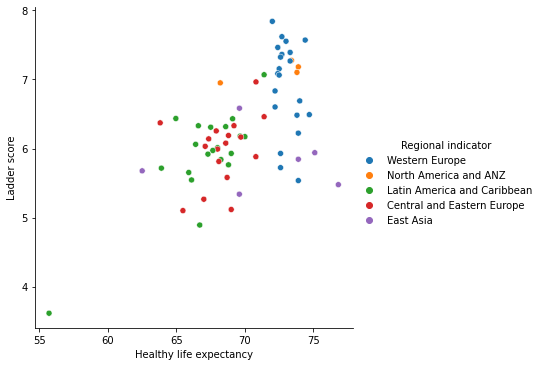

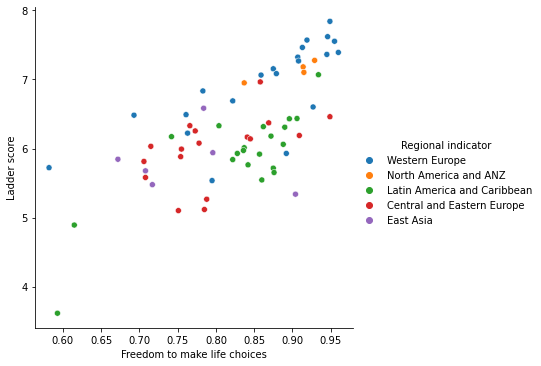

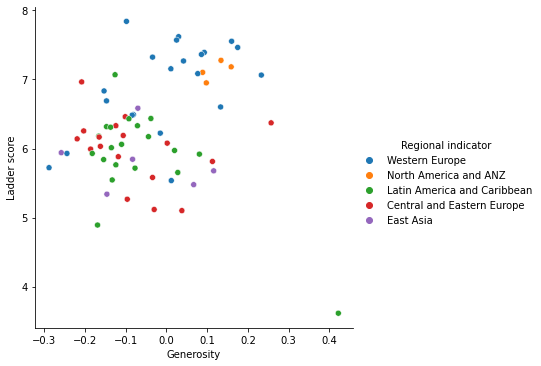

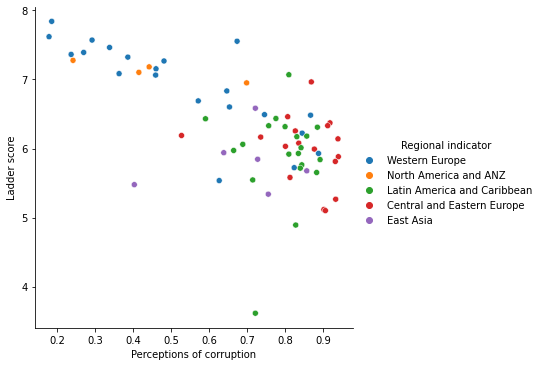

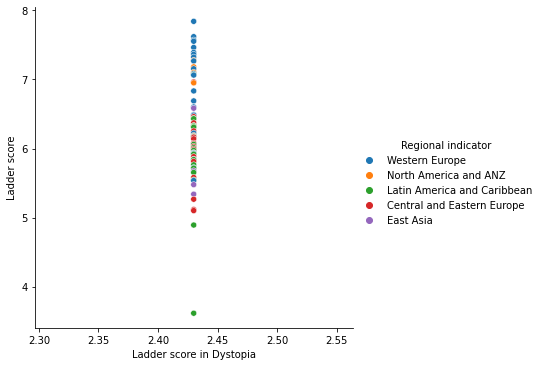

In [17]:

for col in World_Happiness[['Logged GDP per capita', 'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Ladder score in Dystopia']]:
    sns.relplot(
        data = World_Happiness[World_Happiness['Regional indicator'].isin(World_Happiness.groupby('Regional indicator').mean().sort_values(by = 'Ladder score', ascending = False)[:5].index)],
        x= col, y="Ladder score",
        hue="Regional indicator")


In [18]:
World_Happiness['Ladder score in Dystopia'].unique()

array([2.43])

> **From the above, Lineplots and relationplots,for most of the regions, we are seeing a straight relationship between the positive factors and for negative an inverse.**
> **For dystopia vs ladder score, we are getting a straight line as there is just a single unique value present in dystopia column**

## Checking Boxplot

In [19]:
px.box(World_Happiness, x="Ladder score", y="Regional indicator")

> **Latin America and Caribbean has an outlier.**

> **North America and ANZ the box plot is very different. One reason could be there are lesser number of countries in this data.**

> **For western Europe, left tale shows the data is more spread there and same for sub-south african.**
> **East asia, shows a longer right tale.**